In [ ]:
import pandas as pd                               
import numpy as np                               
import tensorflow as tf                           
from tensorflow import keras                      
from tensorflow.keras.models import Sequential    
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  
from tensorflow.keras.optimizers import Adam      
from keras.preprocessing import image             
from keras.preprocessing.image import ImageDataGenerator  
import matplotlib.pyplot as plt

In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/without/01002_Mask_Mouth_Chin.jpg  
  inflating: data/without/01003_Mask_Mouth_Chin.jpg  
  inflating: data/without/01004_Mask_Mouth_Chin.jpg  
  inflating: data/without/01005_Mask_Mouth_Chin.jpg  
  inflating: data/without/01006_Mask_Mouth_Chin.jpg  
  inflating: data/without/01007_Mask_Mouth_Chin.jpg  
  inflating: data/without/01008_Mask_Mouth_Chin.jpg  
  inflating: data/without/01009_Mask_Mouth_Chin.jpg  
  inflating: data/without/01010_Mask_Mouth_Chin.jpg  
  inflating: data/without/01011_Mask_Mouth_Chin.jpg  
  inflating: data/without/01012_Mask_Mouth_Chin.jpg  
  inflating: data/without/01013_Mask_Mouth_Chin.jpg  
  inflating: data/without/01014_Mask_Mouth_Chin.jpg  
  inflating: data/without/01015_Mask_Chin.jpg  
  inflating: data/without/01016_Mask_Mouth_Chin.jpg  
  inflating: data/without/01017_Mask_Mouth_Chin.jpg  
  inflating: data/without/01018_Mask_Mouth_Chin.jpg  
  inflating: data/without/01019_Mask_

In [ ]:
!rm data.zip

In [ ]:
batch_size = 8
epochs = 30
directory = 'data'

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.2,        # Splits the data into training (80%) and validation (20%)
                                   rescale = 1./255,            # Multiple the colors by a number between 0-1 to process data faster
                                   rotation_range=40,           #rotate the images
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')   

In [ ]:
train_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                seed=2020,                      # to make the result reproducible
                                subset = 'training') 

Found 8011 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                subset = 'validation') 

Found 2002 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_generator)

#plotting function

def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

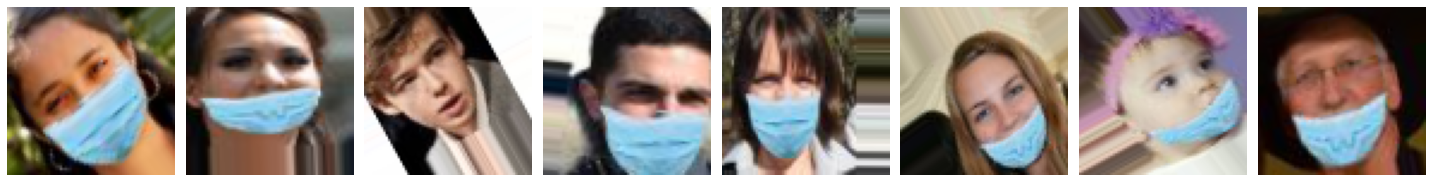

[0. 1. 1. 0. 0. 1. 1. 1.]


In [ ]:
plotImages(imgs);
print(labels);

In [ ]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator)

Epoch 1/30
1002/1002 [==============================] - 77s 76ms/step - loss: 0.3278 - accuracy: 0.8559 - val_loss: 0.3432 - val_accuracy: 0.8661
Epoch 2/30
1002/1002 [==============================] - 76s 76ms/step - loss: 0.2693 - accuracy: 0.8935 - val_loss: 0.4583 - val_accuracy: 0.8017
Epoch 3/30
1002/1002 [==============================] - 76s 76ms/step - loss: 0.2279 - accuracy: 0.9099 - val_loss: 0.2954 - val_accuracy: 0.8806
Epoch 4/30
1002/1002 [==============================] - 76s 76ms/step - loss: 0.1900 - accuracy: 0.9262 - val_loss: 0.2423 - val_accuracy: 0.9091
Epoch 5/30
1002/1002 [==============================] - 76s 76ms/step - loss: 0.1689 - accuracy: 0.9386 - val_loss: 0.1827 - val_accuracy: 0.9301
Epoch 6/30
1002/1002 [==============================] - 75s 75ms/step - loss: 0.1498 - accuracy: 0.9441 - val_loss: 0.1680 - val_accuracy: 0.9401
Epoch 7/30
1002/1002 [==============================] - 76s 76ms/step - loss: 0.1391 - accuracy: 0.9518 - val_loss: 0.1552 -

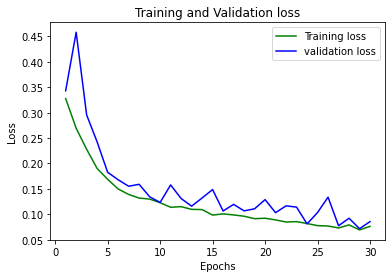

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epochs+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


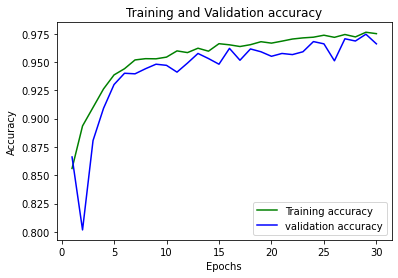

In [22]:
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [25]:
model.save("test2_model.h5")

In [26]:
model.save("test2beta")

INFO:tensorflow:Assets written to: test2beta/assets
